<a href="https://www.kaggle.com/code/nagachanduchandu/deep-cnn-on-cifar-10-dataset?scriptVersionId=116736849" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models,losses,optimizers
from tensorflow.keras import datasets


here we are using cifar10 dataset which has 10 classes.

In [3]:
num_classes=10 # since we are using a cifar10 dataset we have 10 classes.

In [4]:
#lets build the model

def build_model():
    model=models.Sequential()
    #here we are using 32-convolution filters with (3,3)convolution,with padding=same means we are padding with zeros.
    #adding a Batchnormalization layers reduces the problem of internal co-variance shift in the deeper layers.
    model.add(layers.Conv2D(32,(3,3),padding="same",input_shape=x_train.shape[1:],activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32,(3,3),padding="same",activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D(pool_size=(2,2)))# we are using maxpool size of 2.
    model.add(layers.Dropout(0.3))
    
              
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3,3)))
    model.add(layers.Dropout(0.4))
    
    model.add(layers.Conv2D(128,(3,3),padding="same",activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(128,activation='relu'))
    model.add(layers.Dropout(0.5))
   
    model.add(layers.Dense(num_classes,activation="softmax"))#we have 10 classes so,we are using softmax activation with a categorical_crossentropy(log-loss for multiclass) loss.
   
              
    return model
              
              

In [5]:
#now let us load the data
def load_data():
    (x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
#python generally uses 64-bit precision for the floating point numbers,so here
#we are converting it to 32-bit precision to reduce the memory usage
    x_train=x_train.astype('float32')
    x_test=x_test.astype('float32')

#normalize the adata
    e=-0.00000001
    mean=np.mean(x_train,axis=(0,1,2,3))# calculating the mean and std 
    std=np.std(x_train,axis=(0,1,2,3))
    x_train=(x_train-mean)/(std+e)
    x_test=(x_test-mean)/(std+e)

    y_train=tf.keras.utils.to_categorical(y_train,num_classes)# one-hot encoding the labels.
    y_test=tf.keras.utils.to_categorical(y_test,num_classes)

    return x_train,y_train,x_test,y_test


In [6]:
x_train,y_train,x_test,y_test=load_data()

model=build_model()

model.compile(loss="categorical_crossentropy",
             optimizer=optimizers.Adam(),
             metrics=["accuracy"])

170508288/170498071 [==============================] - 3s 0us/step


2023-01-19 02:12:00.055683: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-19 02:12:00.154350: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-19 02:12:00.155119: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-19 02:12:00.156924: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [8]:
history=model.fit(x_train,y_train,
                  batch_size=64,
                  epochs=50,
                  verbose=1, 
                  validation_data=(x_test,y_test))



2023-01-19 02:12:04.985849: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2023-01-19 02:12:06.794525: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


782/782 [==============================] - 14s 9ms/step - loss: 1.9134 - accuracy: 0.3047 - val_loss: 1.5409 - val_accuracy: 0.4286
Epoch 2/50
782/782 [==============================] - 6s 7ms/step - loss: 1.4629 - accuracy: 0.4577 - val_loss: 1.1465 - val_accuracy: 0.5854
Epoch 3/50
782/782 [==============================] - 6s 7ms/step - loss: 1.2188 - accuracy: 0.5676 - val_loss: 0.9554 - val_accuracy: 0.6657
Epoch 4/50
782/782 [==============================] - 6s 7ms/step - loss: 1.0631 - accuracy: 0.6284 - val_loss: 0.8324 - val_accuracy: 0.7119
Epoch 5/50
782/782 [==============================] - 6s 7ms/step - loss: 0.9574 - accuracy: 0.6722 - val_loss: 0.7875 - val_accuracy: 0.7246
Epoch 6/50
782/782 [==============================] - 6s 7ms/step - loss: 0.8825 - accuracy: 0.6965 - val_loss: 0.7535 - val_accuracy: 0.7482
Epoch 7/50
782/782 [==============================] - 6s 8ms/step - loss: 0.8302 - accuracy: 0.7187 - val_loss: 0.6932 - val_accuracy: 0.7585
Epoch 8/50
782/7

In [9]:
model_json=model.to_json()
with open('model_json','w') as json_file:
    json_file.write(model_json)
model.save_weights('model.h5')

In [10]:
score=model.evaluate(x_test,y_test,batch_size=64,verbose=1)
print('\naccuracy:',score[1])
print('loss:',score[0])

157/157 [==============================] - 1s 4ms/step - loss: 0.4450 - accuracy: 0.8623

accuracy: 0.8622999787330627
loss: 0.4450419843196869


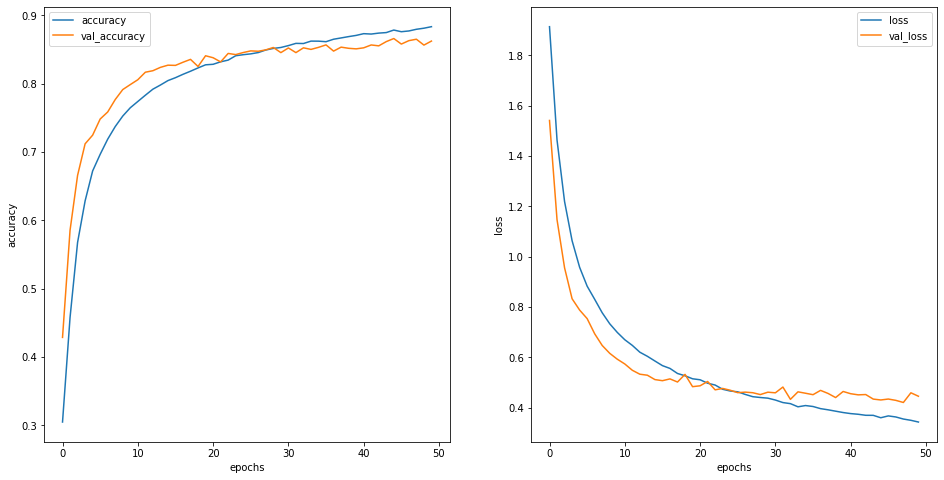

In [11]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

**with this network structure eventhough if we try to use Dataaugmentation the performance won't improve anymore and the model will overfit to the data.******

**here the accuracy is:86% with a much smaller network,if we want to increase the accuracy more we need to use a more deep network with more layers which will capture more information in the images 
(such as vgg16,Resnet).**